In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = sns.load_dataset('titanic')
print(data)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [3]:
data['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [4]:
Q1 = np.quantile(data['fare'].dropna(),0.25)
Q1

7.9104

In [5]:
Q3 = np.quantile(data['fare'].dropna(),0.75)
Q3

31.0

In [6]:
IQR = Q3 - Q1
IQR

23.0896

In [7]:
import scipy


In [8]:
fare_iqr = scipy.stats.iqr(data['fare'])
fare_iqr

23.0896

In [9]:
fare_range = max(data['fare']) - min(data['fare'])
fare_range

512.3292

In [10]:
fare_range2 = np.ptp(data['fare'])
fare_range2

512.3292

In [11]:
# Phương sai
data['fare'].var()

2469.436845743116

In [12]:
# Độ lệch chuẩn
data['fare'].std()

49.6934285971809

In [13]:
# Lệch trái hay lệch phải
data['fare'].skew()

4.787316519674893

In [14]:
# Skewnis = 4.787316519674893 > 0 lệch phải

In [15]:
# Nhọn trung tâm hay trải về 2 bên
data['fare'].kurtosis()

33.39814088089868

In [16]:
# kurtosis = 33.39814088089868 > 0 , phân phối nhọn hơn phân phối chuẩn

<AxesSubplot: >

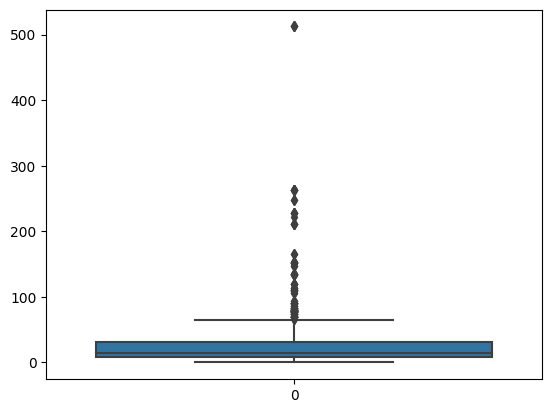

In [17]:

sns.boxplot(data['fare'])


In [18]:
# Biến Category
data['survived'].unique()
# 0 là chết, 1 là sống

array([0, 1], dtype=int64)

In [19]:
data['pclass'].unique()
# 1 hạng nhất, 2 hạng nhì, 3 là hạng ba

array([3, 1, 2], dtype=int64)

<AxesSubplot: xlabel='fare', ylabel='Count'>

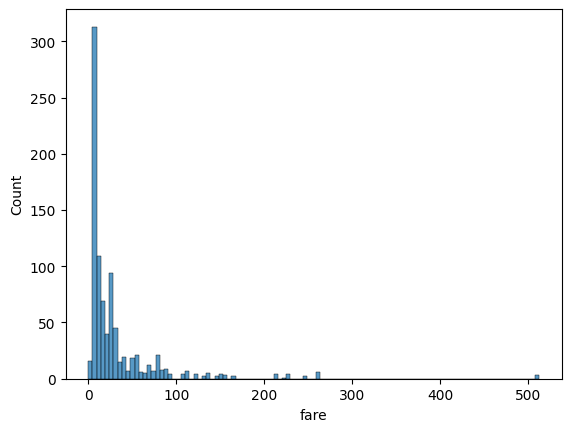

In [20]:
sns.histplot(data['fare'])

<AxesSubplot: >

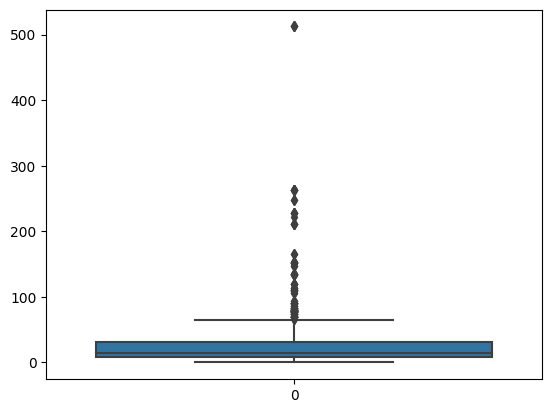

In [21]:
sns.boxplot(data['fare'])

In [22]:
Q3+IQR*1.5

65.6344

In [23]:
data[data['fare']>Q3+IQR*1.5]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
849,1,1,female,NaN,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False


<AxesSubplot: xlabel='fare', ylabel='Density'>

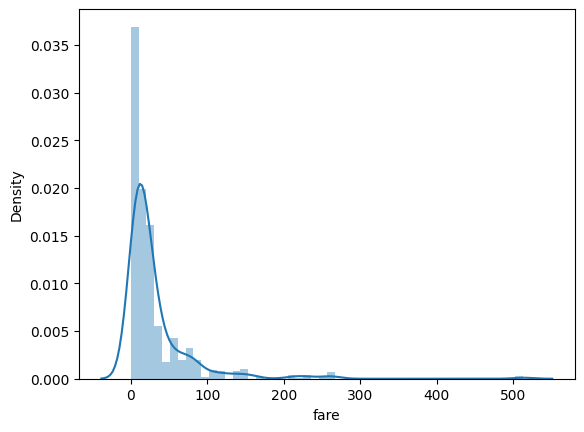

In [24]:
sns.distplot(data['fare'])

In [25]:
data[['fare','age']].quantile([0.25, 0.3, 0.4, 0.5, 0.6, 0.75, 0.8, 0.95])

,fare,age
0.25,7.91040,20.125
0.30,8.05000,22.000
0.40,10.50000,25.000
0.50,14.45420,28.000
0.60,21.67920,31.800
0.75,31.00000,38.000
0.80,39.68750,41.000
0.95,112.07915,56.000


In [26]:
# Phân tích biến phân loại pclass, sex
value_sex = data['sex'].value_counts()

In [27]:
# Phân tích biến phân loại pclass, sex
value_count= data['pclass'].value_counts()
value_count


3    491
1    216
2    184
Name: pclass, dtype: int64

In [28]:
classes = data.groupby('pclass').count()['sex']
classes

pclass
1    216
2    184
3    491
Name: sex, dtype: int64

<AxesSubplot: >

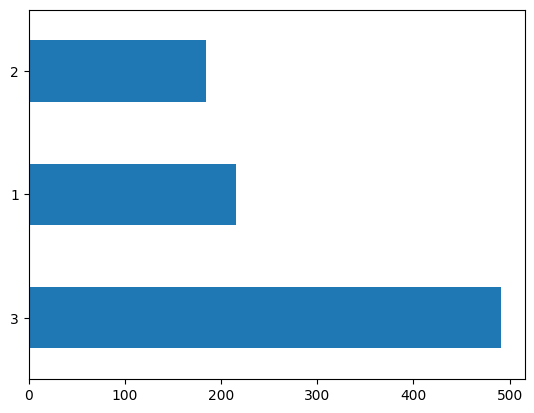

In [29]:
value_count.plot.barh()


<AxesSubplot: ylabel='sex'>

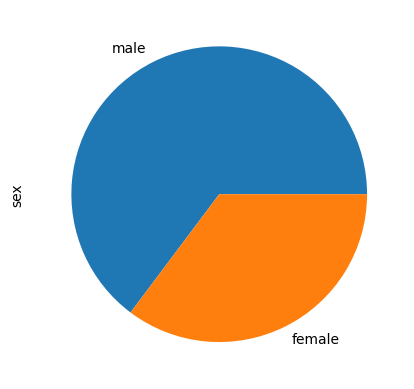

In [30]:
value_sex.plot.pie()

In [31]:
# Bảng 2 chiều Pclass và Sex
table = pd.crosstab(data['pclass'],data['sex'])
table

sex,female,male
pclass,,
1,94,122
2,76,108
3,144,347


<AxesSubplot: xlabel='pclass'>

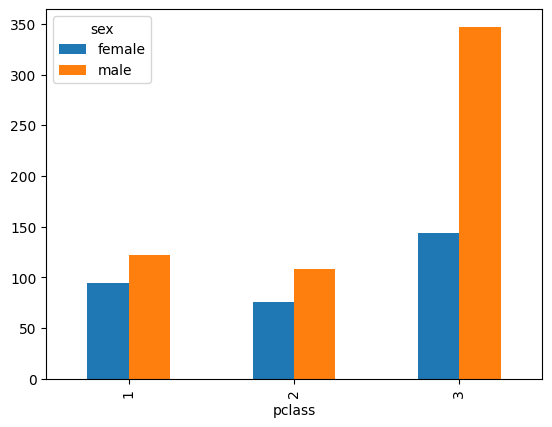

In [32]:
table.plot.bar()

<AxesSubplot: xlabel='pclass'>

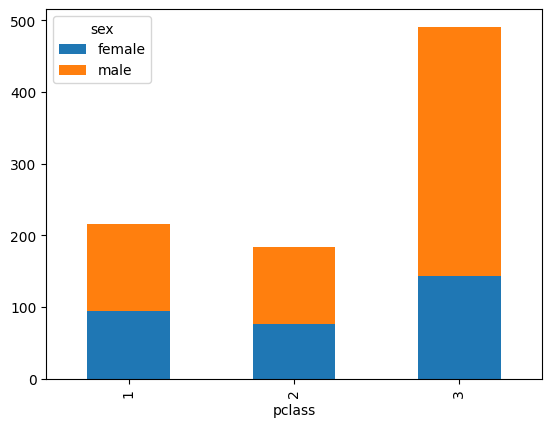

In [33]:
# Cột chồng
table.plot(kind='bar',stacked=True)

In [34]:
# Plcass và Sex
table = pd.crosstab(data['pclass'],data['sex'])
table

sex,female,male
pclass,,
1,94,122
2,76,108
3,144,347


<AxesSubplot: xlabel='pclass'>

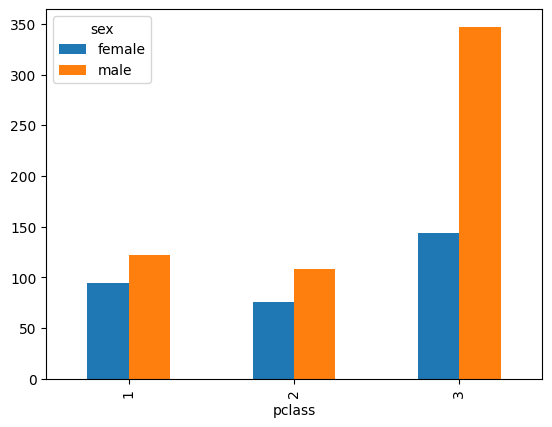

In [35]:
table.plot.bar()

<AxesSubplot: xlabel='pclass'>

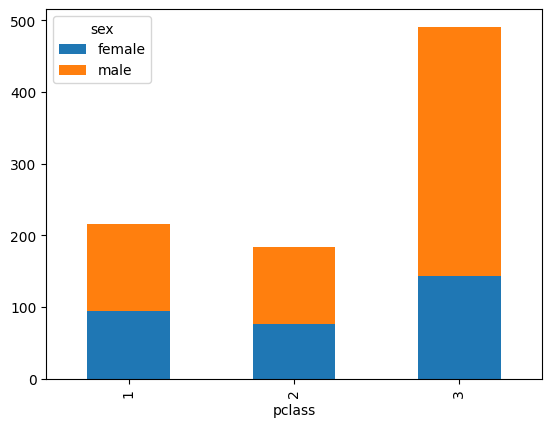

In [36]:
table.plot(kind='bar',stacked=True)

In [37]:
# ussing Chi-square
from scipy.stats import chi2_contingency, chi2

In [38]:
stat, p, dof, expect = chi2_contingency(table)

In [39]:
# (rows - 1)*(cols - 1) trong bảng crosstab
dof

2

In [40]:
stat

16.971499095517114

In [41]:
p

0.00020638864348233114

In [42]:
expect

array([[ 76.12121212, 139.87878788],
       [ 64.84399551, 119.15600449],
       [173.03479237, 317.96520763]])

In [43]:
# Sử dụng statistic để so sánh -> tính critical value
prob = 0.95
critical = chi2.ppf(prob,dof)
critical

5.991464547107979

In [44]:
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Indenpendent (fail to reject H0)')

Dependent (reject H0)


In [45]:
# Sử dụng p- value
alpha = 1 - prob

In [46]:
if p < alpha:
    print('Dependent reject H0')
else:
    print('Indenpendent fail to reject H0')

Dependent reject H0


In [47]:
# ANOVA: biến phân loại và biến liên tục
# Xem xét plcass, sex có ảnh hướng đến fare hay không
d = data[['pclass','sex','fare']]
d.head()

,pclass,sex,fare
0,3,male,7.2500
1,1,female,71.2833
2,3,female,7.9250
3,1,female,53.1000
4,3,male,8.0500


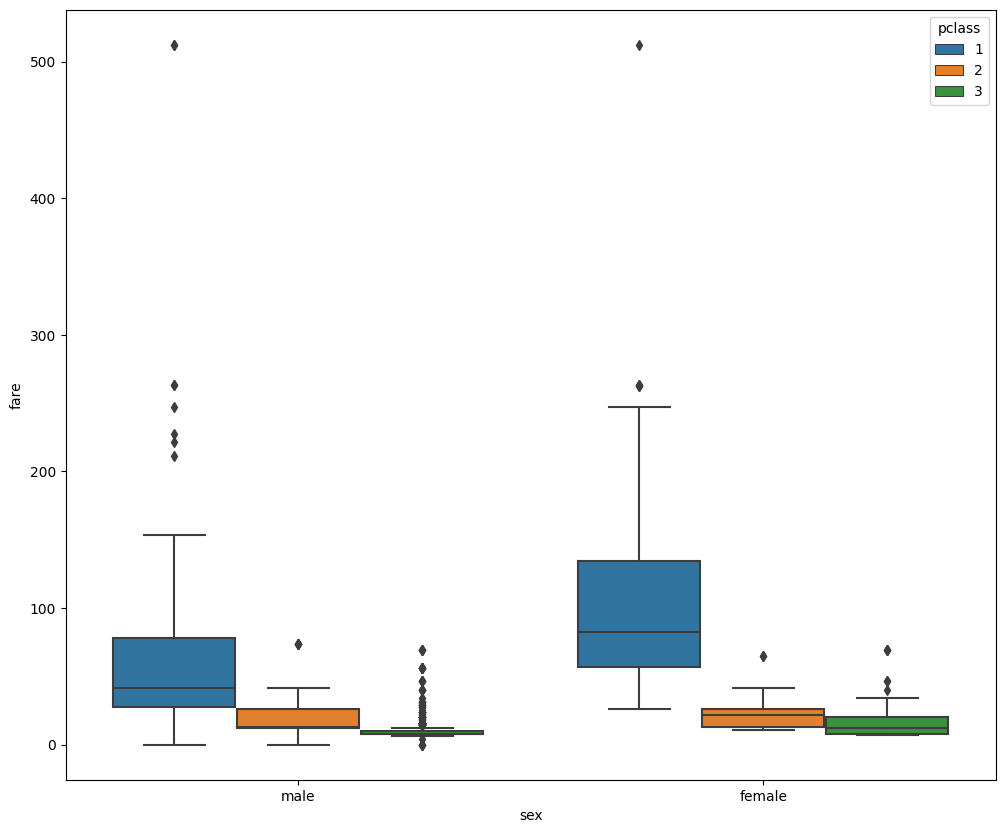

In [48]:
plt.figure(figsize=(12,10))
sns.boxplot(x='sex',y='fare',hue='pclass',data=d)
plt.show()

In [49]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [50]:
models = ols('fare ~ C(pclass) + C(sex) + C(pclass):C(sex)', data=d).fit()
anova_table = sm.stats.anova_lm(models, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
C(pclass),7.347122e+05,2.0,242.620968,9.763645e-85
C(sex),3.174857e+04,1.0,20.968394,5.337586e-06
C(pclass):C(sex),5.002816e+04,2.0,16.520591,9.034206e-08
Residual,1.339992e+06,885.0,NaN,NaN


In [51]:
data.skew()

survived      0.478523
pclass       -0.630548
age           0.389108
sibsp         3.695352
parch         2.749117
fare          4.787317
adult_male   -0.420431
alone        -0.420431
dtype: float64